In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


In [1]:
import pandas as pd

'''let's create a function, feed the training and test data sets as an input, 
and at the output we will get a combined one, without an index'''
def concat_df(train_data, test_data):
    # Returns a concatenated df of training and test set
    return pd.concat([train_data, test_data], sort=True).reset_index(drop=True)

'''Let's create a function at the input of which we feed the combined data set, 
and at the output it returns the separated df of the training and test set, saved without a label'''
def divide_df(all_data):
    # Returns divided dfs of training and test set
    return all_data.loc[:890], all_data.loc[891:].drop(['Survived'], axis=1)



'''The Python Pandas packages helps us work with our datasets. 
We start by acquiring the training and testing datasets into Pandas DataFrames. 
We also combine these datasets to run certain operations on both datasets together.
'''
df_train = pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')  # load train data
df_test = pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')  # load test data
df_all = concat_df(df_train, df_test)  # we apply the function described above, the union of two dataframes.

'''supplement the data sets with the name parameter'''
df_train.name = 'Training Set'  # set parameter for dataset - dataframe name
df_test.name = 'Test Set'  # set parameter for dataset - dataframe name
df_all.name = 'All Set'  # set parameter for dataset - dataframe name 

dfs = [df_train, df_test]

# display information about datasets
print('Number of Training Examples = {}'.format(df_train.shape[0]))
print('Number of Test Examples = {}\n'.format(df_test.shape[0]))
print('Training X Shape = {}'.format(df_train.shape))
print('Training y Shape = {}\n'.format(df_train['Transported'].shape[0]))
print('Test X Shape = {}'.format(df_test.shape))
print('Test y Shape = {}\n'.format(df_test.shape[0]))
print(df_train.columns)
print(df_test.columns)
print(df_train.info())
print(df_train.describe())
df_train.sample(5)

Number of Training Examples = 8693
Number of Test Examples = 4277

Training X Shape = (8693, 14)
Training y Shape = 8693

Test X Shape = (4277, 13)
Test y Shape = 4277

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')
Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           851

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
2972,3216_03,Earth,False,E/213/S,TRAPPIST-1e,23.0,False,0.0,1573.0,0.0,36.0,0.0,Inerry Haydenzier,True
4923,5250_01,Mars,True,F/1007/S,TRAPPIST-1e,22.0,False,0.0,0.0,0.0,0.0,0.0,Clek Dan,True
8228,8796_01,Earth,False,G/1418/S,TRAPPIST-1e,6.0,False,0.0,0.0,0.0,0.0,0.0,Daisya Traverdy,True
4361,4643_01,Earth,False,F/947/P,TRAPPIST-1e,36.0,False,NaN,724.0,0.0,0.0,0.0,Sandie Goodson,True
1660,1762_02,Earth,False,G/275/S,NaN,15.0,False,104.0,NaN,0.0,174.0,253.0,Thery Casez,False


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/tmp/ipykernel_32/2782695866.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_train.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)


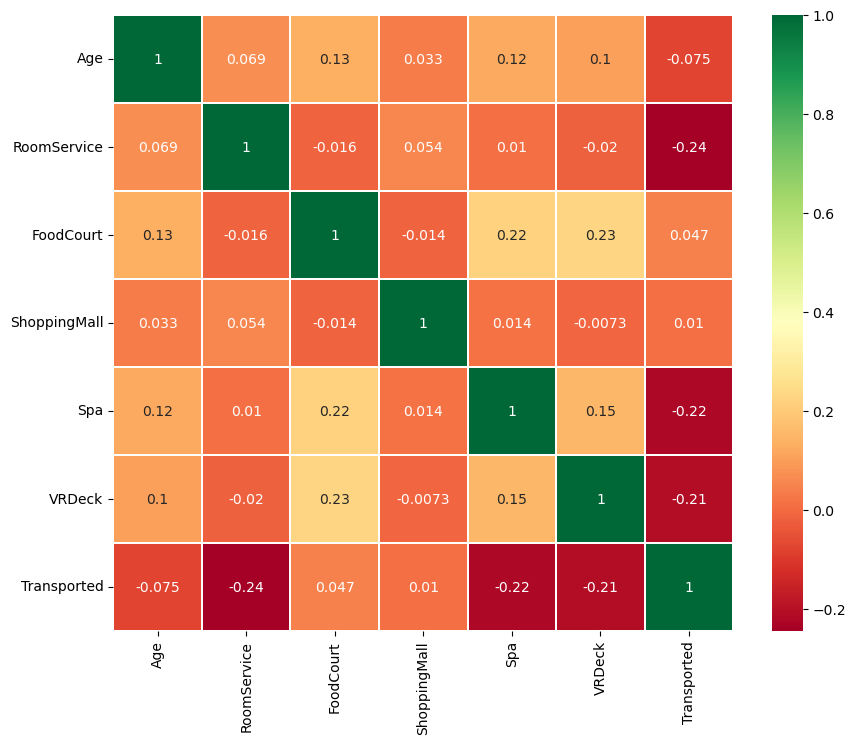

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
'''Correlation Between The Features'''
sns.heatmap(df_train.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()  

In [6]:
# function to analyze each column of the dataframe
def display_missing(df):    
    for col in df.columns.tolist():          
        print('{} column missing values: {}'.format(col, df[col].isnull().sum()))
    print('\n')
    
for df in dfs:
    print('{}'.format(df.name))
    display_missing(df)

Training Set
PassengerId column missing values: 0
HomePlanet column missing values: 201
CryoSleep column missing values: 217
Cabin column missing values: 199
Destination column missing values: 182
Age column missing values: 179
VIP column missing values: 203
RoomService column missing values: 181
FoodCourt column missing values: 183
ShoppingMall column missing values: 208
Spa column missing values: 183
VRDeck column missing values: 188
Name column missing values: 200
Transported column missing values: 0


Test Set
PassengerId column missing values: 0
HomePlanet column missing values: 87
CryoSleep column missing values: 93
Cabin column missing values: 100
Destination column missing values: 92
Age column missing values: 91
VIP column missing values: 93
RoomService column missing values: 82
FoodCourt column missing values: 106
ShoppingMall column missing values: 98
Spa column missing values: 101
VRDeck column missing values: 80
Name column missing values: 94




In [11]:
print(df_train["Name"].nunique())

8473


In [8]:
df_train[["CryoSleep", "Transported"]].groupby(['CryoSleep'], as_index=False).mean().sort_values(by='Transported', ascending=False)

,CryoSleep,Transported
1,True,0.817583
0,False,0.328921


In [9]:
df_train[["Destination", "Transported"]].groupby(['Destination'], as_index=False).mean().sort_values(by='Transported', ascending=False)

,Destination,Transported
0,55 Cancri e,0.610000
1,PSO J318.5-22,0.503769
2,TRAPPIST-1e,0.471175


In [10]:
df_train[["HomePlanet", "Transported"]].groupby(['HomePlanet'], as_index=False).mean().sort_values(by='Transported', ascending=False)

,HomePlanet,Transported
1,Europa,0.658846
2,Mars,0.523024
0,Earth,0.423946


In [43]:
df_train[["VIP", "Transported"]].groupby(['VIP'], as_index=False).mean().sort_values(by='Transported', ascending=False)

,VIP,Transported
0,False,0.506983
1,True,0.370370


In [2]:
# Split the data back into training and test sets
df_train = pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')  # load train data
df_test = pd.read_csv('/kaggle/input/spaceship-titanic/test.csv') 

df_train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [66]:
df_train.dropna(axis=0, inplace=True)  # Supprime les lignes avec des valeurs manquantes dans le DataFrame df_train
df_train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [4]:
df_train['HomePlanet'] = df_train['HomePlanet'].map({'Europa': 0, 'Mars': 1,'Earth': 2}) 
df_train['CryoSleep'] = df_train['CryoSleep'].map({False: 0, True: 1})  # Convertir 'Sex' en valeurs numériques (0 pour 'male', 1 pour 'female')
df_train['VIP'] = df_train['VIP'].map({False: 0, True: 1})

In [5]:
# Prepare the feature matrix and target variable for training
X = df_train[['Spa', 'VRDeck', 'RoomService','CryoSleep','HomePlanet','VIP','ShoppingMall']]
y = df_train['Transported']

In [6]:
X

,Spa,VRDeck,RoomService,CryoSleep,HomePlanet,VIP,ShoppingMall
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,549.0,44.0,109.0,0.0,2.0,0.0,25.0
2,6715.0,49.0,43.0,0.0,0.0,1.0,0.0
3,3329.0,193.0,0.0,0.0,0.0,0.0,371.0
4,565.0,2.0,303.0,0.0,2.0,0.0,151.0
...,...,...,...,...,...,...,...
8688,1643.0,74.0,0.0,0.0,0.0,1.0,0.0
8689,0.0,0.0,0.0,1.0,2.0,0.0,0.0
8690,1.0,0.0,0.0,0.0,2.0,0.0,1872.0
8691,353.0,3235.0,0.0,0.0,0.0,0.0,0.0


In [61]:
import pandas as pd
import xgboost as xgb
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.impute import SimpleImputer


# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.15, random_state=42)

# Create and train the XGBoost model
model = HistGradientBoostingClassifier(learning_rate=0.15,max_bins=255, max_iter=100,
                                          max_depth=3, min_samples_leaf=1,
                                          early_stopping=True, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = model.predict(X_val)
#print(y_pred)
# Evaluate the model's performance on the validation set
accuracy = accuracy_score(y_val, y_pred)
print("Validation Accuracy:", accuracy)


Validation Accuracy: 0.7737730061349694


In [84]:
df_test

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [10]:
df_test['HomePlanet'] = df_test['HomePlanet'].map({'Europa': 0, 'Mars': 1,'Earth': 2})
df_test['CryoSleep'] = df_test['CryoSleep'].map({False: 0, True: 1})  # Convertir 'Sex' en valeurs numériques (0 pour 'male', 1 pour 'female')
df_test['VIP'] = df_test['VIP'].map({False: 0, True: 1}) 

In [11]:
df_test_2 = df_test[['Spa', 'VRDeck', 'RoomService','CryoSleep','HomePlanet','VIP','ShoppingMall']]
df_test_2

,Spa,VRDeck,RoomService,CryoSleep,HomePlanet,VIP,ShoppingMall
0,0.0,0.0,0.0,1.0,2.0,0.0,0.0
1,2823.0,0.0,0.0,0.0,2.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,181.0,585.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,10.0,0.0,2.0,0.0,635.0
...,...,...,...,...,...,...,...
4272,0.0,0.0,0.0,1.0,2.0,0.0,0.0
4273,10.0,144.0,0.0,0.0,2.0,0.0,17.0
4274,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4275,0.0,523.0,0.0,0.0,0.0,0.0,0.0


In [57]:
prediction = model.predict(df_test_2)
predictions = [1 if pred > 0.5 else 0 for pred in prediction]
print("Prédiction :", predictions[1:10])

Prédiction : [0, 1, 1, 1, 0, 1, 1, 1, 1]


In [58]:
df_predictions = pd.DataFrame({'PassengerId': df_test["PassengerId"], 
                               'Transported': predictions})
df_predictions

,PassengerId,Transported
0,0013_01,1
1,0018_01,0
2,0019_01,1
3,0021_01,1
4,0023_01,1
...,...,...
4272,9266_02,1
4273,9269_01,0
4274,9271_01,1
4275,9273_01,1


In [59]:
df_predictions['Transported'] = df_predictions['Transported'].replace({1: True, 0: False})

In [60]:
df_predictions.to_csv('test_33.csv', index=False)